In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from numpy.fft import fft , ifft , fftshift 
# from scipy. fft import fft , ifft , fftshift 
from scipy.signal .windows import hann, flattop

In [4]:
f1 =200 #Hz 
f2 =200.25 #Hz 
fs =800 #Hz 
N=1600 
k=np.arange(N) 
x1=np.sin(2*np.pi*f1/fs*k) 
x2=np.sin(2*np.pi*f2/fs*k)

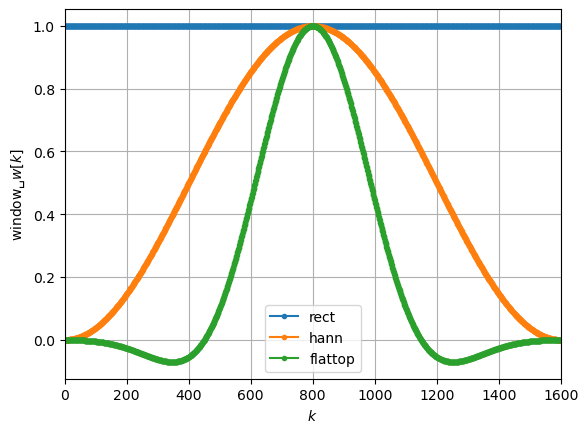

In [7]:
wrect =np.ones(N) 
whann=hann(N, sym=False) 
wflattop= flattop(N, sym=False) 
plt.plot(wrect , 'C0o-' , ms=3, label='rect') 
plt.plot(whann, 'C1o-' , ms=3, label='hann') 
plt.plot(wflattop, 'C2o-' , ms=3, label='flattop') 
plt.xlabel(r'$k$') 
plt.ylabel(r'window␣$w[k]$') 
plt.xlim(0, N) 
plt.legend()
plt.grid(True)

In [8]:
X1wrect= fft(x1) 
X2wrect= fft(x2) 
X1whann= fft(x1*whann) 
X2whann= fft(x2*whann) 
X1wflattop= fft(x1*wflattop) 
X2wflattop= fft(x2*wflattop)

In [13]:
def fft2db(X):
    N=X.size 
    Xtmp=2/N*X # independent of N, norm for sine amplitudes 
    Xtmp[0] *= 1/2 #bin for f=0Hz is existing only once, #so cancel ∗2 from above 
    if N%2==0: # fs/2 is included as a bin # fs/2 bin is existing only once, so cancel ∗2 from above 
        Xtmp[N//2] =Xtmp[N//2] / 2 
        return 20*np.log10(np.abs(Xtmp)) # in dB
# setup of frequency vector this way is independent of N even/odd: 
df = fs/N 
f = np.arange(N)*df

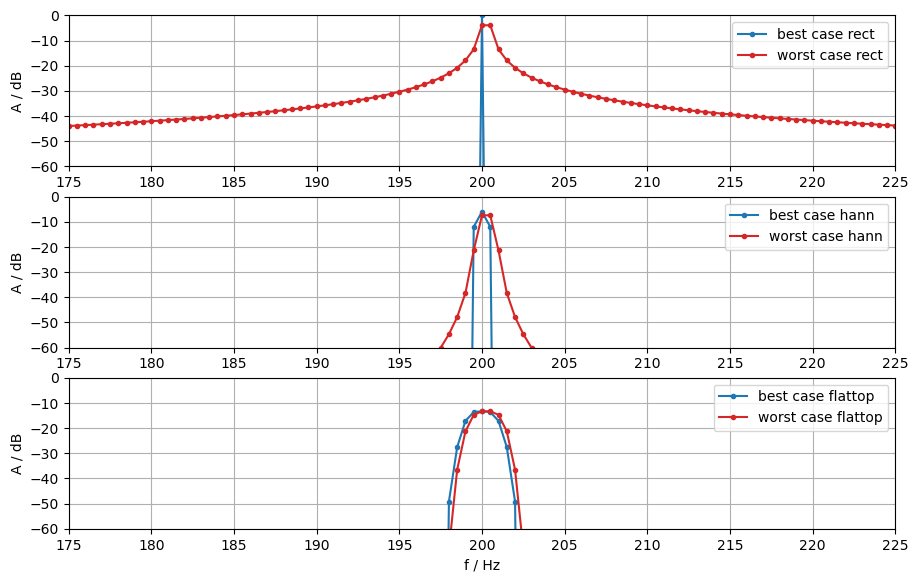

In [24]:
plt.figure(figsize=(16/1.5, 10/1.5)) 
plt.subplot(3, 1, 1) 
plt.plot(f , fft2db(X1wrect), 'C0o-' , ms=3, label='best case rect') 
plt.plot(f , fft2db(X2wrect), 'C3o-' , ms=3, label='worst case rect') 
plt.xlim(175, 225) 
plt.ylim(-60, 0)
plt.xticks(np.arange(175, 230, 5)) 
plt.yticks(np.arange(-60, 10, 10)) 
plt.legend()
#plt .xlabel(’f / Hz’) 
plt.ylabel('A / dB') 
plt.grid(True) 
plt.subplot(3, 1, 2)
plt.plot(f , fft2db(X1whann), 'C0o-' , ms=3, label='best case hann') 
plt.plot(f , fft2db(X2whann), 'C3o-' , ms=3, label='worst case hann') 
plt.xlim(175, 225) 
plt.ylim(-60, 0) 
plt.xticks(np.arange(175, 230, 5)) 
plt.yticks(np.arange(-60, 10, 10)) 
plt.legend() #plt .xlabel(’f / Hz’) 
plt.ylabel('A / dB') 
plt.grid(True) 
plt.subplot(3, 1, 3) 
plt.plot(f , fft2db(X1wflattop), 'C0o-' , ms=3, label='best case flattop')
plt.plot(f , fft2db(X2wflattop), 'C3o-' , ms=3, label='worst case flattop') 
plt.xlim(175, 225) 
plt.ylim(-60, 0) 
plt.xticks(np.arange(175, 230, 5)) 
plt.yticks(np.arange(-60, 10, 10)) 
plt.legend() 
plt.xlabel('f / Hz') 
plt.ylabel('A / dB')
plt.grid(True)

In [27]:
def winDTFTdB(w):
    N = w.size  # get window length
    Nz = 100 * N  # zeropadding length
    W = np.zeros(Nz)  # allocate RAM
    W[0:N] = w  # insert window
    W = np.abs(fftshift(fft(W)))  # fft, fftshift, and magnitude
    W /= np.max(W)  # normalize to maximum, i.e., the mainlobe maximum here
    W = 20 * np.log10(W)  # get level in dB
    # get appropriate digital frequencies
    Omega = 2 * np.pi / Nz * np.arange(Nz) - np.pi  # also shifted
    return Omega, W

/tmp/ipykernel_1949/3603015641.py:8: RuntimeWarning: divide by zero encountered in log10
  W = 20 * np.log10(W)  # get level in dB


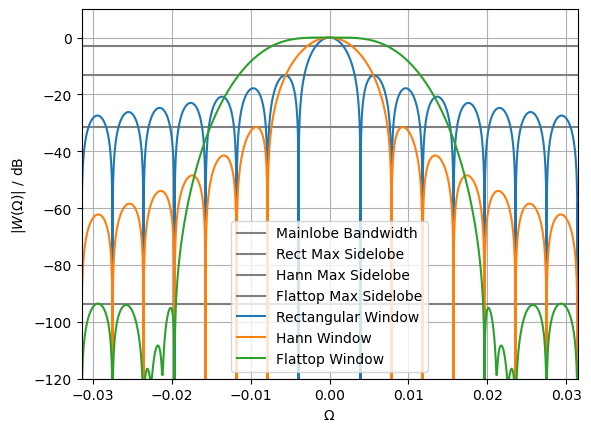

In [28]:
# Create example windows (wrect, whann, and wflattop)
# Replace these with your actual window data

# Plot the mainlobe bandwidth and maximum sidelobe levels
plt.plot([-np.pi, np.pi], [-3.01, -3.01], 'gray', label='Mainlobe Bandwidth')
plt.plot([-np.pi, np.pi], [-13.3, -13.3], 'gray', label='Rect Max Sidelobe')
plt.plot([-np.pi, np.pi], [-31.5, -31.5], 'gray', label='Hann Max Sidelobe')
plt.plot([-np.pi, np.pi], [-93.6, -93.6], 'gray', label='Flattop Max Sidelobe')

# Compute and plot the DTFT magnitude in dB for each window
Omega, W = winDTFTdB(wrect)
plt.plot(Omega, W, label='Rectangular Window')

Omega, W = winDTFTdB(whann)
plt.plot(Omega, W, label='Hann Window')

Omega, W = winDTFTdB(wflattop)
plt.plot(Omega, W, label='Flattop Window')

plt.xlim(-np.pi, np.pi)
plt.ylim(-120, 10)
plt.xlim(-np.pi/100, np.pi/100)  # Zoom into mainlobe
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$|W(\Omega)|$ / dB')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_1949/1078848227.py:73: RuntimeWarning: divide by zero encountered in log10
  W = 20 * np.log10(W)


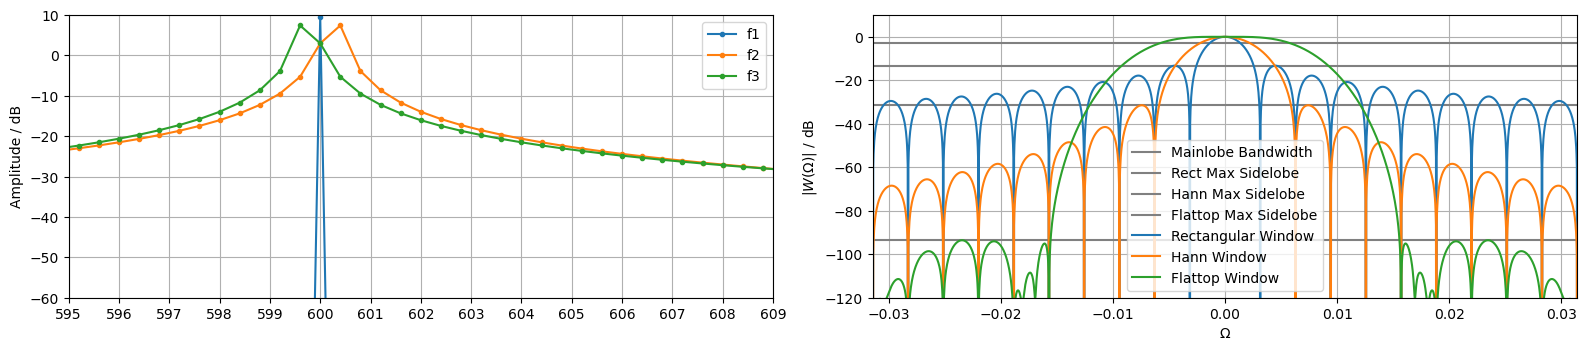

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift
from scipy.signal.windows import hann, flattop


# Parameters
f1 = 600
f2 = 600.25
f3 = 599.75
fs = 800
N = 2000


# Generate sine signals
k = np.arange(N)
x1 = 3 * np.sin(2 * np.pi * f1 / fs * k)
x2 = 3 * np.sin(2 * np.pi * f2 / fs * k)
x3 = 3 * np.sin(2 * np.pi * f3 / fs * k)


# Create windows
wrect = np.ones(N)
whann = hann(N, sym=False)
wflattop = flattop(N, sym=False)


# Calculate DFTs
X1 = fft(x1)
X2 = fft(x2)
X3 = fft(x3)


# Function to normalize and convert to dB
def fft2db(X):
    N = X.size
    Xtmp = 2 / N * X
    Xtmp[0] *= 1 / 2
    if N % 2 == 0:
        Xtmp[N // 2] = Xtmp[N // 2] / 2
    return 20 * np.log10(np.abs(Xtmp))


# Frequency vector
df = fs / N
f = np.arange(N) * df


# Plotting
plt.figure(figsize=(16, 10))


plt.subplot(3, 2, 1)
plt.plot(f, fft2db(X1), 'C0o-', ms=3, label='f1')
plt.plot(f, fft2db(X2), 'C1o-', ms=3, label='f2')
plt.plot(f, fft2db(X3), 'C2o-', ms=3, label='f3')
plt.xlim(595, 605)
plt.ylim(-60, 10)
plt.xticks(np.arange(595, 610, 1))
plt.yticks(np.arange(-60, 20, 10))
plt.legend()
plt.ylabel('Amplitude / dB')
plt.grid(True)


def winDTFTdB(w):
    N = w.size
    Nz = 100 * N
    W = np.zeros(Nz)
    W[0:N] = w
    W = np.abs(fftshift(fft(W)))
    W /= np.max(W)
    W = 20 * np.log10(W)
    Omega = 2 * np.pi / Nz * np.arange(Nz) - np.pi
    return Omega, W


plt.subplot(3, 2, 2)
plt.plot([-np.pi, np.pi], [-3.01, -3.01], 'gray', label='Mainlobe Bandwidth')
plt.plot([-np.pi, np.pi], [-13.3, -13.3], 'gray', label='Rect Max Sidelobe')
plt.plot([-np.pi, np.pi], [-31.5, -31.5], 'gray', label='Hann Max Sidelobe')
plt.plot([-np.pi, np.pi], [-93.6, -93.6], 'gray', label='Flattop Max Sidelobe')


Omega, W = winDTFTdB(wrect)
plt.plot(Omega, W, label='Rectangular Window')


Omega, W = winDTFTdB(whann)
plt.plot(Omega, W, label='Hann Window')


Omega, W = winDTFTdB(wflattop)
plt.plot(Omega, W, label='Flattop Window')


plt.xlim(-np.pi, np.pi)
plt.ylim(-120, 10)
plt.xlim(-np.pi / 100, np.pi / 100)
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$|W(\Omega)|$ / dB')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()
